Name: Arkael Kernizan <br>
Date: 11/25/24

## What are the top 7 restaurants in Jersey City, NJ based on the restaurants ratings? Are the reviews positive or negative?

description of the problem and summary of your solution.
To solve this question, information from the first 20 restaurants is retreived through Yelp Fusion. Information such as ratings, customer reviews, and review count is pulled and stored. From there, becuase some resaurants have more reviews than others, a weighted rating is calculated to give a more balanced analysis. 
TextBlob is inmported for a sentiment analysis on the reviews and WordCloud is imported to generate an image with the top 20 words. 

#### imports

In [1]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [5]:
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode

In [7]:
# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

In [9]:
DEFAULT_TERM = 'Restaurants'
DEFAULT_LOCATION = 'Jersey City, NJ'
SEARCH_LIMIT = 20

In [11]:

def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    # print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """
    
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)

def computeWeightedRating(currentRating, numOfReviews, avgRating, medReviews):
    """ Generate new ratings for restaurants to account for discrepancy in number of reviews
    Args:
        current rating (float): current rating from individual restaurant
        numOfReviews (float): number of reviews from individual restaurant 
        avgRating (float): average rating from all restaurants
        medReviews (float): median number of reviews
    Returns:
        float: new weighting rating
    """
    return ((currentRating * numOfReviews) + (avgRating * medReviews)) / (numOfReviews + medReviews)
    

In [13]:
response = search(APIKEY,DEFAULT_TERM, DEFAULT_LOCATION)

In [15]:
# store number of reviews for each business
reviewCount = []
# total ratings from each business
totalBusRatings = 0

for business in response['businesses']:
    reviewCount.append(business['review_count'])
    totalBusRatings += business['rating']

size = len(reviewCount)
avgRating = totalBusRatings/size

# order reviewCount from smallest to largest to find median
reviewCount.sort()
medianNumReview = (reviewCount[size // 2] + reviewCount[(size // 2) - 1]) / 2

# weighted rating list
newRating = []
for business in response['businesses']:
    busRating = business['rating']
    busReviews = business['review_count']
    new_Rating = computeWeightedRating(busRating, busReviews, avgRating, medianNumReview)
    new_Rating = round(new_Rating, 3)
    newRating.append({business['name']: new_Rating})
newRating

[{'ONDO Jersey City': 4.345},
 {'Cafe Alyce': 4.4},
 {'Jane Doe': 4.3},
 {'Hudson & Co': 3.976},
 {'The Hutton': 4.308},
 {'Prince & I': 4.361},
 {'Pinwheel Garden Dumpling & Noodle Bar': 4.408},
 {'Ita Italian Kitchen': 4.43},
 {"Harry's Daughter": 4.254},
 {'Cellar 335': 4.305},
 {'DOMODOMO Jersey City': 4.305},
 {'Rumba Cubana': 4.306},
 {'The Roxy': 4.326},
 {'Casa De Lobo': 4.299},
 {'Capoeira Restaurant': 4.339},
 {'Fire and Oak': 4.097},
 {'Low Fidelity': 4.344},
 {'Blu on the Hudson': 4.308},
 {'Dullboy': 4.198},
 {'Razza': 4.228}]

In [17]:
sortedRating = sorted(newRating, key=lambda x: list(x.values())[0], reverse=True)
top_7 = sortedRating[:7]

Plotting top 7 business with their ratings, with help of ChatGPT

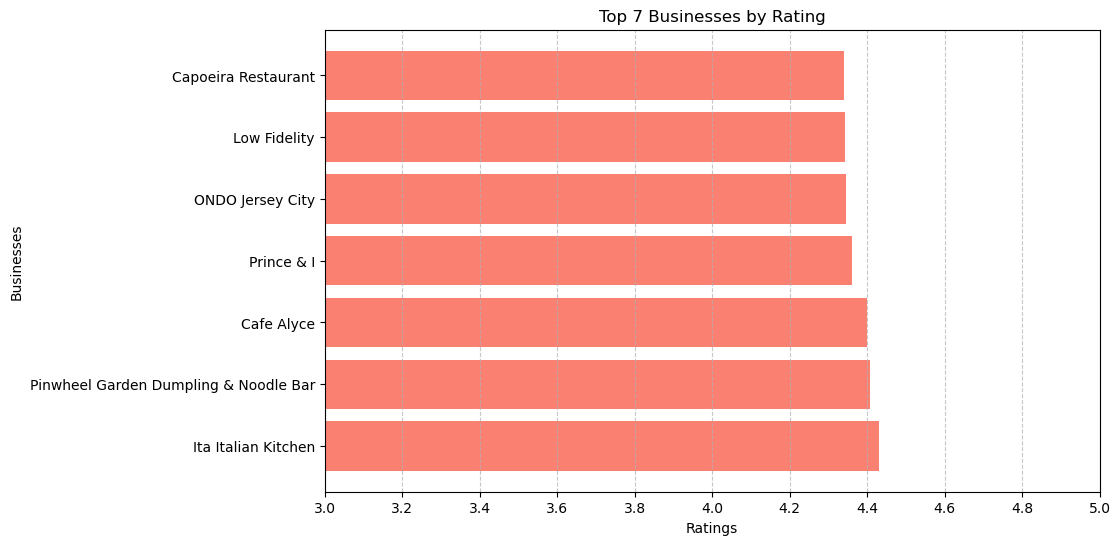

In [20]:
# Extract names and ratings
business_names = [list(business.keys())[0] for business in top_7]
ratings = [list(rating.values())[0] for rating in top_7]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(business_names, ratings, color='salmon')
plt.xlabel('Ratings')
plt.xlim(3, 5)  # X-axis from 3 to 5
plt.xticks([x for x in range(3, 6)] + [3.2, 3.4, 3.6, 3.8, 4.2, 4.4, 4.6, 4.8])

plt.ylabel('Businesses')
plt.title('Top 7 Businesses by Rating')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

From the collected data, Korai Kitchen has the highest rating with almost 4.6 stars out of 5. Ita Italian Kitchen, Cafe Alyce, and No Forks Given are the second through fourth best restaurants, all having more than a 4.4 star ratings.

In [24]:
# counter variables
posSent = 0
negSent = 0
neutralSent = 0

# store the reviews to perform a sentiment analysis 
for business in response['businesses']:
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    reviews = request(API_HOST,BUS_REVIEW, APIKEY)
    for review in reviews['reviews']:
        blob = TextBlob(review['text'])
        sent = blob.sentiment.polarity
    
        if sent > 0:
            posSent += 1
        elif sent < 0:
            negSent += 1
        else:
            neutralSent += 1
            

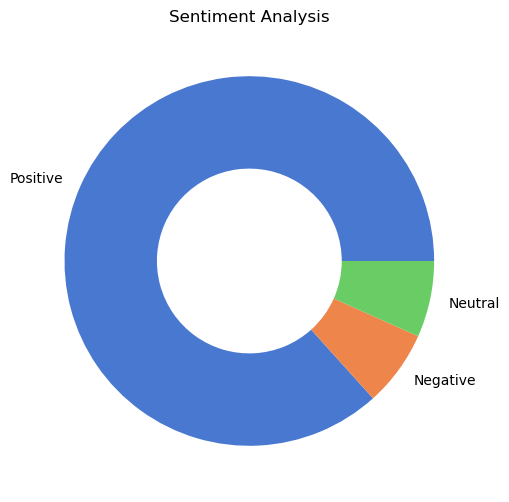

In [26]:
# Define data
pos = posSent
neg = negSent
net = neutralSent

labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, net]
colors = sns.color_palette("muted", len(values))

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors = colors)
ax.set_title('Sentiment Analysis')
plt.show()

The Sentiment Analysis shows that a majority of the reviews recieved for the first 20 restaurants are overwhelmingly positive. There are also some neutral reviews, with about half as many negative reviews than neutral.

In [28]:
posSent = 0
negSent = 0
neutralSent = 0

for business in response['businesses']:
    # print(response)
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    
    
    reviews = request(API_HOST,BUS_REVIEW, APIKEY)
    for review in reviews['reviews']:
        blob = TextBlob(review['text'], analyzer = NaiveBayesAnalyzer())
        #Sentiment(classification='pos', p_pos=0.9999999926830248, p_neg=7.3169677451898355e-09)
        sentiment = blob.sentiment.classification


        if sentiment == 'pos':
            posSent += 1
        elif sentiment == 'neg':
            negSent += 1
        else:
            neutralSent += 1
            

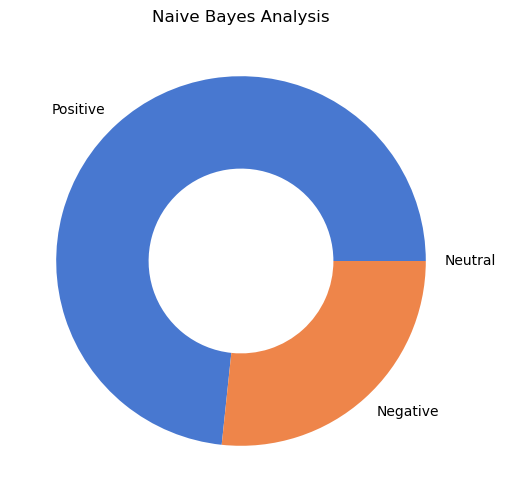

In [30]:
pos = posSent
neg = negSent
net = neutralSent

labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, net]
colors = sns.color_palette("muted", len(values))

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors = colors)
ax.set_title('Naive Bayes Analysis')

plt.show()


The data from the Naive Bayes Analysis shows a much higher amount of negative reviews than the Sentiment Analysis. The Naive Bayes Analysis deems that almost 25% of the reviews were in a negaitve sentiment.

In [32]:
stop_words = stopwords.words('english') 
yelpReviews = []

for business in response['businesses']:
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, APIKEY)
    
# TextBlob("Great place for drinks! for a small, hidden bar on a side street - they make a good cocktail. they have indoor seating, 
# plenty of it, but also a small...")   
    
    for review in reviews['reviews']:
        yelpReviews.append(review['text'])
        # items = blob.word_counts.items()
        
        # items = [item for item in items if item[0] not in stop_words]
        # yelpReviewWords.append(items)
            # if item[0] not in stop_words:
            #     yelpReviewWords.append(item)

In [34]:
yelpReview = ' '.join(yelpReviews)

In [36]:
blob = TextBlob(yelpReview)
items = blob.word_counts.items()

In [38]:
items = [item for item in items if item[0] not in stop_words]

In [40]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top_20 = sorted_items[0:21]
top_20

[('food', 17),
 ('place', 15),
 ('really', 10),
 ('came', 10),
 ('great', 9),
 ('jersey', 8),
 ('experience', 8),
 ('good', 8),
 ('bar', 7),
 ('alyce', 6),
 ('restaurant', 6),
 ('pizza', 6),
 ('get', 6),
 ('city', 6),
 ('like', 5),
 ('amazing', 5),
 ('best', 5),
 ('time', 5),
 ('last', 5),
 ('menu', 5),
 ('one', 5)]

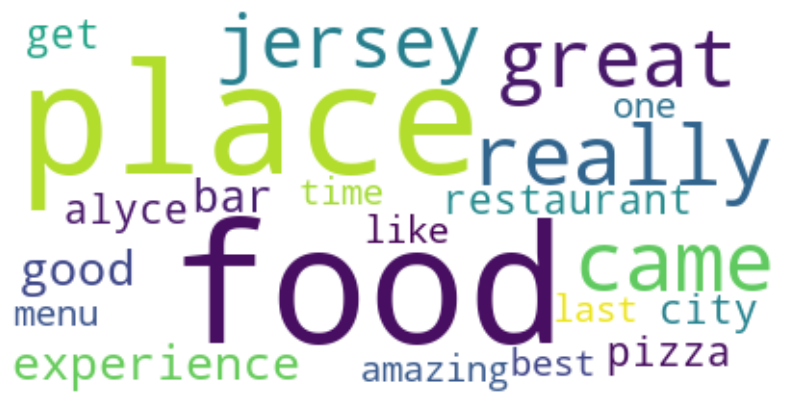

In [42]:
word_dict = dict(top_20)

# Create the word cloud
wordcloud = WordCloud(background_color='white', colormap='viridis').generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

The Word Cloud shows the top 20 words among the reviews from the 20 restaurants.